## Ismétlés előző óráról

**Generátor függvény**: olyan függvény, amiben a `yield` kulcsszó szerepel.

* A függvény meghívásakor a ,,függvény törzse'' nem kerül végrehajtásra, a visszatérési érték egy iterátor. 

* Ha a `next` függvényt a kapott iterátorra alkalmazzuk, akkor 
a generátor függvény törzsének végrehajtása a következő `yield` statement-ig folytatódik. 
* A `next` függvény visszatérési értéke a `yield` után álló kifejezés értéke.
* A generátor függvény törzsének végrehajtása ezen a ponton felfüggesztődik. A program végrehajtása a `next` függvénytől folytatódik. 

In [1]:
def f():
    yield 1
    yield -1

it = f()
print(f"{it=}, {next(it)=}, {next(it)=}, {next(it, None)=}")

it=<generator object f at 0x771c8dea3680>, next(it)=1, next(it)=-1, next(it, None)=None


## Osztályok (`class`) és egyedek (objektumok vagy értékek)

- Osztály vagy `class` tulajdonképpen  a típus. Ez mondja meg, hogy milyen műveletek (metódusok, methods) értelmesek az adott típusú értékekre (objektumokra).

- Python-ban minden objektum, azaz minden értéknek van típusa, ami definiálja a műveleteket az adott típuson. Ezt igazából láttuk korábban. pl. a sztringek típusa `str` és így sztringeken az `str` osztály által definált műveletek végezhetőek.

In [2]:
s = "alma"
print(f"{type(s)=}, {str.upper(s)=}, {s.upper()=}")

type(s)=<class 'str'>, str.upper(s)='ALMA', s.upper()='ALMA'


A műveletekre a `.` jelölés is használható.

In [4]:
print(f"{(13).bit_length()=}, {(13).bit_count()=}, {(13).to_bytes(2, 'big')=}")

(13).bit_length()=4, (13).bit_count()=3, (13).to_bytes(2, 'big')=b'\x00\r'


In [5]:
print(f"{int.bit_length(13)=}, {int.bit_count(13)=}, {int.to_bytes(13, 2, 'big')=}")

int.bit_length(13)=4, int.bit_count(13)=3, int.to_bytes(13, 2, 'big')=b'\x00\r'


Szintén a `.` jelöléssel érhetőek el az adott objektum **attribútumai**. Ezek olyan értékek, amik az adott objektumhoz tartoznak.

Az előző példában az `int` osztály egy attribútuma a `bit_length` függvény. Ez minden egyes egész számnak is attribútuma.

## Osztály definíció

In [6]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __repr__(self):
        return f"Person(name={self.name!r}, age={self.age})"
    
    def __str__(self):
        return f"{self.name} is {self.age} years old"

In [7]:
p = Person("Alice", 42)
print(f"{repr(p)=}, {str(p)=}")

repr(p)="Person(name='Alice', age=42)", str(p)='Alice is 42 years old'


In [8]:
class Config:
    def __init__(self, eps=1e-6, max_iter=1000):
        self.eps = eps
        self.max_iter = max_iter

    def __repr__(self):
        items = ', '.join(f"{key}={value!r}" for key, value in vars(self).items())
        return f"Config({items})"

config = Config()
config.eps = 1e-5
config.method = 'Newton' 
config

Config(eps=1e-05, max_iter=1000, method='Newton')

In [9]:
vars(config), vars(type(config))

({'eps': 1e-05, 'max_iter': 1000, 'method': 'Newton'},
 mappingproxy({'__module__': '__main__',
               '__init__': <function __main__.Config.__init__(self, eps=1e-06, max_iter=1000)>,
               '__repr__': <function __main__.Config.__repr__(self)>,
               '__dict__': <attribute '__dict__' of 'Config' objects>,
               '__weakref__': <attribute '__weakref__' of 'Config' objects>,
               '__doc__': None}))

## Múlt órai feladat 


> Adott egy számokból álló lista `numbers` és egy `k` pozitív egész, ahol `1 <= k <= len(numbers)`. Számítsuk ki a `k` hosszú blokkok maximumait. Az eredmény `n - k + 1` hosszú lista.


A hatékony implementációhoz olyan adatszerkezetre lenne szükség, mint a lista, de azzal a plusz tulajdonsággal, hogy mindkét végéhez gyorsan lehessen hozzáfűzni ill. onnan törölni.

### Ábra a múlt órai algoritmushoz 

In [10]:
labels = ["not in window", "in window", "max in window", "potential max"]
colors = ["lightgray", "blue", "red", "orange"]

def get_labels(numbers, k, w_start):
    labels = [0] * len(numbers)
    window_max = max(numbers[w_start: w_start+k])
    for i in range(w_start, w_start+k):
        labels[i] = 1
        if numbers[i] == window_max:
            labels[i] = 2
        elif numbers[i] == max(numbers[i: w_start+k]):
            labels[i] = 3
    return labels

def get_colors(*args):
    return [colors[label] for label in get_labels(*args)]

In [ ]:
idx = []
labels = []
values = []
frame = []
for w_start in range(len(numbers)-k+1):
    idx.extend(range(len(numbers)))
    labels.extend(get_labels(numbers, k, w_start))
    values.extend(numbers)
    frame.extend([w_start] * len(numbers))

df = pd.DataFrame({"position": idx, "value": values, "label": labels, "frame": frame})

In [ ]:
fig = px.scatter(
    data_frame = df,
    x="position",  
    y="value", 
    color = "label",
    color_discrete_map=labels2colors,
    animation_frame="frame",
    animation_group="position",
)
fig.update_traces(marker=dict(size=15))

In [ ]:
fig.show()

In [ ]:
ax.legend?

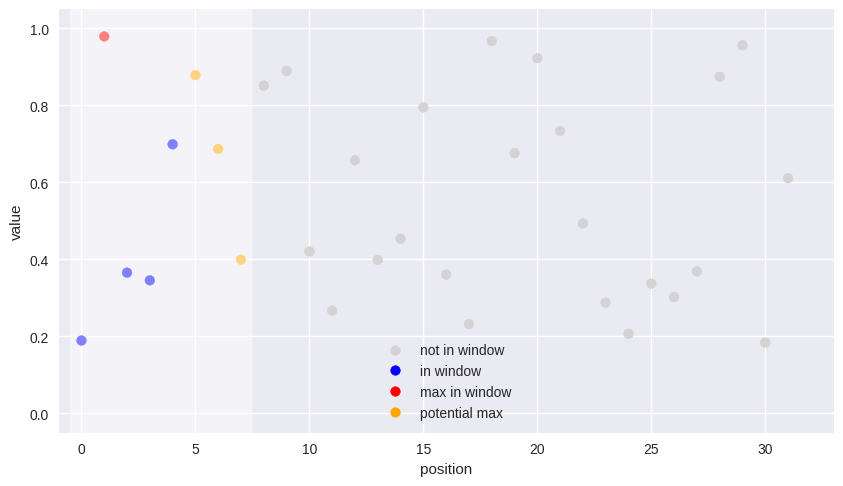

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import random

n = 32
k = 8
numbers = [random.random() for _ in range(n)]

mpl.rcParams["animation.html"] = "jshtml"
plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.set_xlim(-1, n+1)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel("position")
ax.set_ylabel("value")
scatter = ax.scatter(range(n), numbers, s=50, c=get_labels(numbers, k, 0), cmap=mpl.colors.ListedColormap(colors))
fill = ax.fill([-0.5, k-0.5, k-0.5, -0.5], [-0.05, -0.05, 1.05, 1.05], color="white", alpha=0.5)

ax.legend(scatter.legend_elements()[0], labels)

plt.show()
def update(frame):
    scatter.set_array(get_labels(numbers, k, frame))
    fill[0].set_xy([*zip([-0.5+frame, k-0.5+frame, k-0.5+frame, -0.5+frame], [-0.05, -0.05, 1.05, 1.05])])
    return scatter, fill

anim = animation.FuncAnimation(fig, update, frames=range(n-k+1), interval=500)

In [12]:
anim

In [13]:
from collections import deque

def window_maxes_slow(numbers, k):
    return [max(numbers[i: i+k]) for i in range(len(numbers)-k+1)]

def window_maxes(numbers, k):
    queue = deque(maxlen=k)
    maxes = []
    for i, num in enumerate(numbers):
        if i >= k and queue[0] == numbers[i-k]:
            queue.popleft()
        while queue and queue[-1] < num:
            queue.pop()
        queue.append(num)
        if i >= k-1:
            maxes.append(queue[0])
    return maxes

In [15]:
import ipytest
ipytest.autoconfig()

In [16]:
%%ipytest

def test_window_maxes():
    for _ in range(20):
        random_numbers = [random.randint(0, 1000)  for _ in range(200)]
        assert window_maxes_slow(random_numbers, 100) == window_maxes(random_numbers, 100)


.                                                                                            [100%]
1 passed in 0.01s


## Futási idők

In [ ]:
print(f"{len(random_numbers)=}")
k = len(random_numbers)//2
%time maxes = window_maxes_slow(random_numbers, k)
%time maxes = window_maxes(random_numbers, k)

## `deque` helyett `list` típussal

In [17]:
def window_maxes_with_list(numbers, k):
    queue = []
    maxes = []
    for i, num in enumerate(numbers):
        if i >= k and queue[0] == numbers[i-k]:
            queue.pop(0)
        while queue and queue[-1] < num:
            queue.pop()
        queue.append(num)
        if i >= k-1:
            maxes.append(queue[0])
    return maxes


## Teszt

In [18]:
%%ipytest

def test_window_maxes_list():
    for i in range(1, 20):
        n = i*1000
        numbers = [random.randint(0, 10000)  for _ in range(n)]
        assert (
            window_maxes_with_list(numbers, n//2) == 
            window_maxes(numbers, n//2)
        )

.                                                                                            [100%]
1 passed in 0.20s


## Futási idő

In [21]:
n = 50_000
random_numbers = [random.random() for _ in range(n)]
print(f"{len(random_numbers)=:_}")
print("listával ", end=" ")
%timeit -n 10 maxes = window_maxes_with_list(random_numbers, n//2)
print("deque-val", end=" ")
%timeit -n 10 maxes = window_maxes(random_numbers, n//2)

len(random_numbers)=50_000
listával  10.9 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
deque-val 12.2 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Lehet, hogy a lista típus jobb mint gondoltuk?

In [22]:
for n in [10_000, 20_000]:
    non_random_numbers = [*reversed(range(n))]
    print(f"{len(non_random_numbers)=:_}")
    print("listával ", end=" ")
    %timeit -n 10 maxes = window_maxes_with_list(non_random_numbers, n//2)
    print("deque-val", end=" ")
    %timeit -n 10 maxes = window_maxes(non_random_numbers, n//2)

len(non_random_numbers)=10_000
listával  4.47 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
deque-val 1.81 ms ± 7.85 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
len(non_random_numbers)=20_000
listával  14 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
deque-val 3.61 ms ± 54 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Véletlen számok esetén az ablakokhoz tartozó sorozatok átlagos hossza lassan a nő az ablak hosszával.

**HF.** 
- $k$ hosszú véletlen számokból álló ablak esetén, átlagosan milyen hosszú a hozzá rendelt sorozat? 
- Feltudunk-e írni rekurziót az átlagos hosszra $k$ függvényében? 
<!-- - Ki tudjuk-e számolni az első néhány száz értéket? Szimuláció is egy lehetőség. -->
<!-- Az is egy lehetséges megoldás, ha véletlen sorozatokra megnézzük, mi az átlagos `deque` hossz.
 -->
 
`deque` használatakor minden műveletnél van egy konstans extra költség. Ez összeségében több lehet, mint amit a másolások számának csökkentésével nyerünk.   


## Egyéb hasznos adatszerkezetek (More collections)

További gyakran használatos adatszerkezetek érhetők el a `collections` könyvtárban. Az itt implementált adatszerkezeteket be kell importálni, hogy használni tudjuk.

```python
import collections
```

- `deque`

- `Counter`

- `defaultdict`

- `namedtuple`

## `defaultdict`,  szótár ahol az értékeknek default értéke van. 

A `defaultdict` egy olyan szótár, amely nem dob hibát, ha nemlétező kulcsot keresünk benne, hanem ilyenkor beteszi az új kulcsot egy alapértelmezett értékkel: `defaultdict(int)` esetén a default érték 0, `defaultdict(list)` esetén az üres lista, `defaultdict(set)` esetén az üres halmaz.

In [27]:
import collections # A collections könyvtár tartalma elérhető a collections-prefixszel
d = collections.defaultdict(int)
# print(d)

In [26]:
import collections as cl # `cl` egy alias, ezen keresztül lehet elérni a modul elemeit
d = cl.defaultdict(int)
# print(d)

In [28]:
from collections import defaultdict # A globális névtérben lesz a beimportált függvény.
d = defaultdict(int)
print(d)

defaultdict(<class 'int'>, {})


## Feladat.

Számoljuk meg egy szövegben a karakterek gyakoriságait!

In [29]:
from collections import defaultdict

def count_letters(string):
    counts = defaultdict(int)
    for char in string:
        counts[char] += 1 
    return dict(counts) 

text = "Ez egy próba szöveg. Nem kell, hogy értelme legyen"
print(count_letters(text))

{'E': 1, 'z': 2, ' ': 8, 'e': 8, 'g': 4, 'y': 3, 'p': 1, 'r': 2, 'ó': 1, 'b': 1, 'a': 1, 's': 1, 'ö': 1, 'v': 1, '.': 1, 'N': 1, 'm': 2, 'k': 1, 'l': 4, ',': 1, 'h': 1, 'o': 1, 'é': 1, 't': 1, 'n': 1}


## `collections.Counter` számláló

Mivel megszámlálni elemeket elég gyakori feladat, erre van egy külön osztály, ami ezt a problémát oldja meg.

In [31]:
from collections import Counter

counter = Counter(text)
print(f"{counter.most_common(n=3)=}")
print(counter)

counter.most_common(n=3)=[(' ', 8), ('e', 8), ('g', 4)]
Counter({' ': 8, 'e': 8, 'g': 4, 'l': 4, 'y': 3, 'z': 2, 'r': 2, 'm': 2, 'E': 1, 'p': 1, 'ó': 1, 'b': 1, 'a': 1, 's': 1, 'ö': 1, 'v': 1, '.': 1, 'N': 1, 'k': 1, ',': 1, 'h': 1, 'o': 1, 'é': 1, 't': 1, 'n': 1})


### A `Counter` osztály műveletei:

In [32]:
count1 = Counter(range(5))
count2 = Counter(range(-2, 3))
count3 = Counter([1,1,2,1])
print(f"{count1+count2=}, {count2-count3=}")
print(f"{count1&count3=}, {count1|count3=}")

count1+count2=Counter({0: 2, 1: 2, 2: 2, 3: 1, 4: 1, -2: 1, -1: 1}), count2-count3=Counter({-2: 1, -1: 1, 0: 1})
count1&count3=Counter({1: 1, 2: 1}), count1|count3=Counter({1: 3, 0: 1, 2: 1, 3: 1, 4: 1})


## `collections.namedtuple`

Végül egy jópofa adatszerkezetről lesz szó, a `namedtuple`-ről, ami egy olyan tuple, ahol a mezők nem csak index alapján, hanem név alapján is elérhetők.

Ez árnyalatnyival lassabb a `tuple`-nél, de sokkal gyorsabb mint ha ugyanerre a célra osztályt használnánk.

In [33]:
def seconds_to_time(seconds):
    """Convert time in seconds to hour, minute, second format"""
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return hours, minutes, seconds


seconds_to_time(10000)

(2, 46, 40)

In [34]:
from collections import namedtuple

Time = namedtuple("Time", ["hour", "minute", "second"])

def seconds_to_time_2(seconds):
    """Convert time in seconds to hour, minute, second format"""
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return Time(hour=hours, minute=minutes, second=seconds)

result = seconds_to_time_2(10000)
print(result)
print(f"{result.hour=}, {result.minute=}, {result.second=}")

Time(hour=2, minute=46, second=40)
result.hour=2, result.minute=46, result.second=40


# Saját típus, amivel összeadás, szorzás végezhető a szokásos módon

## Polinomok 

Tudunk-e olyan `Polinom` osztályt definiálni, amivel pl. következő kód működik.
```python
p = Polinom(1, 2) # p(x) = x+2
q = Polinom(2, 0, 1) # q(x) = 2x^2 + 1
p+q # -> 2x^2+x+3
p*q # -> 2x^3+4x^2+x+3 
```

Másszóval honnan tudja a Python értelmező, mit kell csinálni, ha `p+q`-t, `p*q`-t írunk, ahol `p`, `q` tetszőleges típusú.

Hasonlóan, honnan derül ki mit kell csinálni, ha `p[1]`-írunk, vagy `p[1] = 3`-at, vagy  `1 in p`-t.  

## `Dunder` metódusok: `__` elejű és végű metódusok.

Ilyenre már láttunk példát.

- `__init__`: ezt az objektum létrehozásakor használja a Python.

- `__str__`: Ez a string konverziót végző metódus. `str(x)` esetén az `x` objektum `__str__` műveletének az eredményét kapjuk. Ha ilyen nincs megadva, akkor az alapértelmezett változatot.

- `__repr__`: A `repr` függvény ezt használja, hogy a sztring reprezentációt kiszámolja.

In [35]:
def print_lines(names, max_lines, per_line):
    for i in range(0, len(names), per_line):
        print(", ".join(names[i: i+per_line]), end="")
        if i == (max_lines-1)*per_line:
            if i < len(names):
                print(", ...")
            else:
                print()
            break
        print()
    
def print_dunder(cls, max_lines=float("inf"), per_line=8):
    print_lines([attr for attr in dir(cls) if attr.startswith("__")], max_lines, per_line)
    
def print_methods(cls, max_lines=float("inf"), per_line=8):
    print_lines([attr for attr in dir(cls) if not attr.startswith("_")], max_lines, per_line)


### Az `int` típus dunder metóduainak listája:

In [39]:
print_dunder(int, 8, 6)

__abs__, __add__, __and__, __bool__, __ceil__, __class__
__delattr__, __dir__, __divmod__, __doc__, __eq__, __float__
__floor__, __floordiv__, __format__, __ge__, __getattribute__, __getnewargs__
__gt__, __hash__, __index__, __init__, __init_subclass__, __int__
__invert__, __le__, __lshift__, __lt__, __mod__, __mul__
__ne__, __neg__, __new__, __or__, __pos__, __pow__
__radd__, __rand__, __rdivmod__, __reduce__, __reduce_ex__, __repr__
__rfloordiv__, __rlshift__, __rmod__, __rmul__, __ror__, __round__, ...


Néhány példa a listából:

- `1+2: (1).__add__(2)`,  `1-2: (1).__sub__(2)`, `1*2 -> (1).__mul__(2)`

- `1 / 2: (1).__truediv__(2)`,  `1 // 2 -> (1).__floordiv__(2)`

- `1 & 2: (1).__and__(2)`, `1 | 2: (1).__or__(2)`, `1 ^ 2: (1).__xor__(2)`

- `1 < 2: (1).__lt__(2)`, `1 == 2: (1).__eq__(2)`

- ` 1 << 2: (1).__rshift__(2)`

### A `list` típus dunder metódusai

In [42]:
print_dunder(list,10,6)

__add__, __class__, __class_getitem__, __contains__, __delattr__, __delitem__
__dir__, __doc__, __eq__, __format__, __ge__, __getattribute__
__getitem__, __gt__, __hash__, __iadd__, __imul__, __init__
__init_subclass__, __iter__, __le__, __len__, __lt__, __mul__
__ne__, __new__, __reduce__, __reduce_ex__, __repr__, __reversed__
__rmul__, __setattr__, __setitem__, __sizeof__, __str__, __subclasshook__


**Újdonságok:**

- `__len__`, a `len` függvény ezt használja. 
  ```python
  lst = [1, 2, 3] 
  len(lst) # a háttérben  lst.__len__() függvény hívás történik.
  ```

- `__getitem__`,  a lista elemeihez ezzel férünk hozzá
  ```python
  lst[1] # a háttérben lst.__getitem__(1) függvény hívás történik.
  ```

- `__setitem__`, a lista elemét ezzel írhatjuk felül.
  ```python
  lst[1] = 3 # a háttérben lst.__setitem__(1, 3) függvény hívás történik.
  ```

- `__contains__`, a tartalmazást kérdezi le
  ```python
  1 in lst # a háttérben lst.__contains__(1) függvény hívás történik.
  ```

- `__iter__` az `iter` függvény ezt használja

- `__iadd__`, `__imul__`, inplace `+` és `*`
  ```python
  lst += [1, 2, 3] # -> lst.__iadd__([1, 2, 3])
  ```

**HF.** Egészekre nincs `__iadd__` és `__imul__`, vajon miért? `i = 0; i += 1` esetén mi történik?

## Egy érdekesség

Ha egy típus definiálja a `__call__` dunder metódust, akkor ,,függvényként'' is használhatóak az egyedei.

In [43]:
import random
class UniqueValues:
    def __init__(self):
        self.values = set()
    def __call__(self, x):
        if x in self.values:
            return False
        self.values.add(x)
        return True
    def reset():
        self.values.clear()
    def __repr__(self):
        return str(self.values)
    
uv = UniqueValues()
print(f"{sum(uv(random.randint(0, 10)) for _ in range(10))=}, {uv=}")

sum(uv(random.randint(0, 10)) for _ in range(10))=5, uv={0, 3, 4, 5, 6}


# Műveletek Polinomokkal


Ha a `Polinom` osztályunk egyedeivel műveletet akarunk végezni, akkor a `__add__`, `__mul__`, `__divmod__` metódusokat kellene definálni.

**HF** írjuk meg a `__call__` metódust, ami a kiszámolja a polinom helyettesítési értékét.

In [44]:
class Polinom:
    def __init__(self, *coefficients):
        """
        coefficients: tuple of coefficients of the polinom, starts with the leading coefficient.
        Polinom(1, 2, 3) -> x^2 + 2x + 3

        self.coefficients: tuple of coefficients of the polinom, starts with the constant term.
        """
        coefficients = list(coefficients[::-1])
        while coefficients and coefficients[-1] == 0:
            coefficients.pop()
        self.coefficients = tuple(coefficients)
    
    def __repr__(self):
        return f"Polinom({', '.join(map(str, reversed(self.coefficients)))})"

In [45]:
p = Polinom(0, 0, 0, 0, 1, 2)
p

Polinom(1, 2)

Az `__str__` metódus kiszámolhatná a `a_n x^n + ... + a_0` reprezentációt.

Itt elég sok mindenre figyelni kellene:

- negatív együttható esetén nem kell a `+` jel

- nulla együttható esetén a tagot ki lehet hagyni. 

- ha az együttható sorozat üres, akkor az azonosan nulla polinomunk van.

- `x^0`-t nem kell kiírni, `x^1` egyszerűen `x`.

**HF** lehetne egy ,,rendes'' `__str__` metódus elkészítése.

In [46]:
def format_tag(exponent, coeff):
    sep = "+" if coeff >= 0 else "-"
    coeff = abs(coeff)
    if exponent == 0:
        return sep, f"{coeff}"
    else:
        if coeff == 1:
            coeff = ""
        if exponent == 1:
            return sep, f"{coeff}x"
        else:
            return sep, f"{coeff}x^{exponent}"

In [47]:
print(f"{format_tag(0, 1)=}")
print(f"{format_tag(0, -2)=}")
print(f"{format_tag(1, -1)=}")
print(f"{format_tag(1, -2)=}")

print(f"{format_tag(2, 2)=}")
print(f"{format_tag(2, 1)=}")
print(f"{format_tag(2, -1)=}")
print(f"{format_tag(2, -2)=}")

format_tag(0, 1)=('+', '1')
format_tag(0, -2)=('-', '2')
format_tag(1, -1)=('-', 'x')
format_tag(1, -2)=('-', '2x')
format_tag(2, 2)=('+', '2x^2')
format_tag(2, 1)=('+', 'x^2')
format_tag(2, -1)=('-', 'x^2')
format_tag(2, -2)=('-', '2x^2')


In [48]:
def poly_str(self):
    if len(self.coefficients) == 0:
        return "0"
    c = [ 
        tag
        for exponent, coeff in enumerate(self.coefficients) if coeff != 0
        for tag in reversed(format_tag(exponent, coeff)) 
    ]
    if c[-1] == "+":
        c.pop()
    return "".join(reversed(c))


Polinom.__str__ = poly_str

In [51]:
p = Polinom(0, 5, 0, -1)
str(p), p

('5x^2-1', Polinom(5, 0, -1))

Láttuk, hogy `python`-ban `str` és `repr` szöveges reprezentációja is lehet egy értéknek.

Ha jupyter notebookban dolgozunk, akkor további szöveges formátumok is megadhatóak:

- `latex` a `_repr_latex_` metódussal
- `html` a `_repr_html_` metódussal

In [52]:
from IPython.display import display_markdown
from textwrap import dedent
text = display.__doc__
display_markdown(dedent(text[text.find('   Notes'):]), raw=True)

Notes
 -----

 In Python, objects can declare their textual representation using the
 `__repr__` method. IPython expands on this idea and allows objects to declare
 other, rich representations including:

   - HTML
   - JSON
   - PNG
   - JPEG
   - SVG
   - LaTeX

 A single object can declare some or all of these representations; all are
 handled by IPython's display system.

 The main idea of the first approach is that you have to implement special
 display methods when you define your class, one for each representation you
 want to use. Here is a list of the names of the special methods and the
 values they must return:

   - `_repr_html_`: return raw HTML as a string, or a tuple (see below).
   - `_repr_json_`: return a JSONable dict, or a tuple (see below).
   - `_repr_jpeg_`: return raw JPEG data, or a tuple (see below).
   - `_repr_png_`: return raw PNG data, or a tuple (see below).
   - `_repr_svg_`: return raw SVG data as a string, or a tuple (see below).
   - `_repr_latex_`: return LaTeX commands in a string surrounded by "$",
                     or a tuple (see below).
   - `_repr_mimebundle_`: return a full mimebundle containing the mapping
                          from all mimetypes to data.
                          Use this for any mime-type not listed above.

 The above functions may also return the object's metadata alonside the
 data.  If the metadata is available, the functions will return a tuple
 containing the data and metadata, in that order.  If there is no metadata
 available, then the functions will return the data only.

 When you are directly writing your own classes, you can adapt them for
 display in IPython by following the above approach. But in practice, you
 often need to work with existing classes that you can't easily modify.

 You can refer to the documentation on integrating with the display system in
 order to register custom formatters for already existing types
 (:ref:`integrating_rich_display`).

 .. versionadded:: 5.4 display available without import
 .. versionadded:: 6.1 display available without import

 Since IPython 5.4 and 6.1 :func:`display` is automatically made available to
 the user without import. If you are using display in a document that might
 be used in a pure python context or with older version of IPython, use the
 following import at the top of your file::

     from IPython.display import display



In [53]:
def poly_latex(self):
    return f"${str(self)}$"

Polinom._repr_latex_ = poly_latex

In [54]:
p

Polinom(5, 0, -1)

In [55]:
def poly_neg(self): # csak azért van így, hogy a kód kiférjen a diára
    return Polinom(*(-coeff for coeff in reversed(self.coefficients)))

def poly_rmul(self, other): # csak azért van így, hogy a kód kiférjen a diára
    return Polinom(*(coeff*other for coeff in reversed(self.coefficients)))

Polinom.__neg__ = poly_neg
Polinom.__rmul__ = poly_rmul

In [58]:
display(-p)
display(2*p)

Polinom(-5, 0, 1)

Polinom(10, 0, -2)

## Aritmetikai műveletek.

In [59]:
def poly_add(self, other): # csak azért van így, hogy a kód kiférjen a diára
    c0 = self.coefficients
    c1 = other.coefficients
    if len(c0) > len(c1):
        c0, c1 = c1, c0
    c = [c0[i] + c1[i] if i < len(c0) else c1[i] for i in range(len(c1))]
    return Polinom(*reversed(c))

def poly_sub(self, other):
    return self + (-other)

Polinom.__sub__ = poly_sub
Polinom.__add__ = poly_add

In [60]:
p = Polinom(1, 2, 3)
display(p)
q = Polinom(0, 1, 1)
display(q)
p+q

Polinom(1, 2, 3)

Polinom(1, 1)

Polinom(1, 3, 4)

## Szorzás

In [61]:
def poly_mul(self, other): # csak azért van így, hogy a kód kiférjen a diára
    if not isinstance(other, type(self)):
        return other*self
    c0 = self.coefficients
    c1 = other.coefficients
    c = [0] * (len(c0) + len(c1) - 1)
    for i, c0i in enumerate(c0):
        for j, c1j in enumerate(c1):
            c[i+j] += c0i * c1j
    return Polinom(*reversed(c))

Polinom.__mul__ = poly_mul

In [62]:
display(p)
display(q)
p*q

Polinom(1, 2, 3)

Polinom(1, 1)

Polinom(1, 3, 5, 3)

## Osztás

Euklideszi algoritmus:

```python
def divmod(p, q):
    """
    p = mq + r, where the degree of r is smaller than the degree of q
    """
    if degree(p) < degree(q):
        return Polinom(), p
    else:
        c = leading_coeff(p)/leading_coeff(q)
        m0, r = divmod(p-c*q, q)
        return m0+c*x^(degree(p)-degree(q)), r
```

**HF**  implementáljuk  a maradékos osztást. 

## Hatványozás

Ismételt szorzás. A legegyszerűbb implementáció

In [63]:
def poly_pow(self, n): # csak azért van így, hogy a kód kiférjen a diára
    if n == 0:
        return Polinom(1)
    result = self
    for _ in range(n-1):
        result *= self
    return result

Polinom.__pow__ = poly_pow

In [64]:
display(p)
p**2

Polinom(1, 2, 3)

Polinom(1, 4, 10, 12, 9)

## Lehet-e hatékonyabban számolni?

Ha a kitevő $n$ és $n=\sum_{i=0}^{k} \epsilon_i 2^i$, akkor
$$
    p^n = \prod_{i\leq k,\epsilon_i = 1} p^{2^i}
$$

Itt 
$$
    p^{2^i} = p^{2\cdot 2^{i-1}} = p^{2^{i-1}}\cdot p^{2^{i-1}}
$$
Így  a $p^{2^i}$ $i=0, 1, \dots, k$ sorozat kiszámítása $k$ szorzással megkapható. A végeredmény pedig további legfeljebb $k$ szorzással. Összeségében $n-1$ szorzás helyett $2*\log_{2}(n)$ szorzás is elég.  

**HF** implementáljuk a szorzást hatékonyabban.

# Összefoglalás

A Python nagyon flexibilis. Sok minden úgy van megoldva, hogy az általunk definált típusok is úgy használhatóak, mint a beépített típusok. Ehhez általában dunder metódusokat kell definiálnunk.

Gyakran nem kell minden metódust megírni, mert vannak alapértelmezett megoldások.

Például, ha egy típus a `__len__` és `__getitem__` műveletekkel rendelkezik, akkor a `__contains__` `__iter__` anélkül is működni fog, hogy azt külön implementálnánk.

In [66]:
def poly_len(self): # csak azért van így, hogy a kód kiférjen a diára
    return len(self.coefficients) # igazából a fokszám+1, mert a főegyüttható nem lehet 0
Polinom.__len__ = poly_len

def poly_getitem(self, i): # csak azért van így, hogy a kód kiférjen a diára
    return self.coefficients[i] # p[0] a konstans tag, p[1] az x együttható, stb.
Polinom.__getitem__ = poly_getitem
p = Polinom(1,2,3,4)
print(f"{[*iter(p)]=}, {0 in p=}, {len(p)=}, {p[1]=}")

[*iter(p)]=[4, 3, 2, 1], 0 in p=False, len(p)=4, p[1]=3


# Lehet-e függvényként használni az `+`, `*`, stb operátorokat?

Az `operator` beépített könyvtár segítségével ez elérhető.

In [67]:
from operator import add, sub, mul
ops = {'+': add, '-': sub, '*': mul}
def eval_expression(expression: list) -> int:
    stack = []
    for token in expression:
        if token in ops:
            b = stack.pop()
            a = stack.pop()
            stack.append(ops[token](a, b))
        else:
            stack.append(token)
    return stack[0]
# 4 * (3 + 2) = 20
print(eval_expression([2, 3, "+", 4, "*"]))
print(eval_expression([Polinom(1, 2), Polinom(3), "+", 4, "*"]))

20
4x+20


# Olvasás fileból, adatok mentése fileba 

## Fájlműveletek, fájlbeolvasás (File handling)

In [69]:
filepath = "./data/P0022_names.txt"

Jupyter notebookban a felkiáltójellel kezdődő sorok operációs rendszer parancsként hajtódnak végre. 
pl. Linux alatt a `head` parancsot használhatjuk a következő sorral

In [70]:
!head -n 5 {filepath}

MARY
PATRICIA
LINDA
BARBARA
ELIZABETH


Ahhoz, hogy egy filehoz hozzáférjünk először meg kell nyitni, használat után pedig be kell zárni (legalábbis illik).

In [71]:
names = []

f = open(filepath)
print(f"{type(f)=}")

for line in f:
    names.append(line)

## rövidebb megoldás: names = [*iter(f)]
f.close()

type(f)=<class '_io.TextIOWrapper'>


In [72]:
names[:5]

['MARY\n', 'PATRICIA\n', 'LINDA\n', 'BARBARA\n', 'ELIZABETH\n']

In [73]:
f = open(filepath, "r")
names = [line.rstrip() for line in f]
f.close()

In [74]:
names[:5]

['MARY', 'PATRICIA', 'LINDA', 'BARBARA', 'ELIZABETH']

In [75]:
f = open(filepath, "r")
names = f.read().splitlines()
f.close()

In [76]:
names[:5]

['MARY', 'PATRICIA', 'LINDA', 'BARBARA', 'ELIZABETH']

Elég gyakori, hogy ha egy ,,erőforrást'' használni akarunk, akkor ,,meg kell nyitni'' és használat után ,,be kell zárni''. 

A Python erre a `with` statement-et használja.

In [77]:
with open(filepath, "r") as f:
    names = f.read().splitlines()

names[:5]

['MARY', 'PATRICIA', 'LINDA', 'BARBARA', 'ELIZABETH']

### Szövegfile írása.


In [80]:
filepath = "/tmp/test.txt"

with open(filepath, "w") as f:
    for _ in range(3):
        print("Ez egy teszt", file=f)
    with open(filepath, "r") as f0:
        print("olvasás a with ciklus vége előtt")
        print(*f0, sep="")
print("="*50)
    
with open(filepath, "r") as f0:    
    print(*f0, sep="")


olvasás a with ciklus vége előtt

Ez egy teszt
Ez egy teszt
Ez egy teszt



Használhatjuk a `.write` metódust is.

In [82]:
filepath = "/tmp/test.txt"

with open(filepath, "w") as f:
    for _ in range(3):
        f.write("Ez egy teszt\n")
        f.flush()
    with open(filepath, "r") as f0:
        print("olvasás a with ciklus vége előtt")
        print(*f0, sep="")
print("="*50)
    
with open(filepath, "r") as f0:    
    print(*f0, sep="")


olvasás a with ciklus vége előtt
Ez egy teszt
Ez egy teszt
Ez egy teszt

Ez egy teszt
Ez egy teszt
Ez egy teszt



- Ha az openben a mód paraméter `"w"`, akkor megnyitáskor töröljük a file tartalmát.

- Ha a file végére szeretnénk fűzni új szöveget akkor az `"a"` (append) módot kell használni.

- Ha bináris formátumú file-lal dolgozunk, akkor iráskor és olvasáskor is hozzá kell tenni a "b" betűt is a módhoz.

In [86]:
import pickle

filepath = "/tmp/test.pkl"
with open(filepath, "wb") as f:
    pickle.dump({"a": 1, "b": 2}, f)

with open(filepath, "rb") as f:
    print(f"{pickle.load(f)=}")


pickle.load(f)={'a': 1, 'b': 2}


In [89]:
import pickle

filepath = "/tmp/test.pkl"
with open(filepath, "ab") as f:
    pickle.dump({"a": 1, "b": 2}, f)

with open(filepath, "rb") as f:
    while True:
        try:
            print(f"{pickle.load(f)=}")
        except EOFError:
            break


pickle.load(f)={'a': 1, 'b': 2}
pickle.load(f)={'a': 1, 'b': 2}
pickle.load(f)={'a': 1, 'b': 2}
pickle.load(f)={'a': 1, 'b': 2}


## Mitől lesz egy file (open ereménye) a `with` után használható? 

In [ ]:
print_dunder(f)

<!-- Az `open` függvény azért használható a `with` statement-tel, mert van egy
 -->
 
A magyarázat kulcsa az `__enter__` és az `__exit__` metódus. Azokat az objektumokat, amik ezekkel rendelkeznek
`contextmanager`-nek is hívják.

Mi történik a következő kódrészlet végrehajtásakor?
```python
with obj as x:
    pass # do something with x
```

1. `x = obj.__enter__()`.  Ezen a ponton az `obj` objektum feljegyezheti, mit akar visszaállítani ha a `with` blokk véget ért. 

2. Törzs kiértékelése. Ez a példában `pass` nem csinál semmit.

3. `obj.__exit__(...)` végrehajtása. Itt a `...` paraméterek azt írják le, hogy sikerült-e a `with` blokk törzsét végrehajtani.